In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import requests
from bs4 import BeautifulSoup

In [2]:
df = pd.read_csv("cleaned_laptops_new.csv")
df

,Price,ratings,Page number,Original_price,Discount,Brand,Processor,no_of_Ratings,no_of_Reviews,Ram,Storage
0,38990,4.3,1,56919,31%,DELL,AMD,2013,135,16,512
1,38990,4.2,1,54479,28%,DELL,Intel,399,30,16,512
2,15990,3.8,1,32990,51%,Acer,Intel,6774,603,8,128
3,49990,4.3,1,89990,44%,ASUS,Intel,3463,275,16,512
4,12990,3.9,1,28690,54%,Lenovo,MediaTek,3181,272,4,512
...,...,...,...,...,...,...,...,...,...,...,...
978,37899,4.4,41,40870,7%,ASUS,Intel,851,154,4,512
979,35990,4.1,41,52115,30%,HP,Intel,2057,125,8,512
980,38990,4.2,41,54479,28%,DELL,Intel,399,30,16,512
981,58599,4.2,41,75494,22%,HP,Intel,813,64,8,512


In [3]:
df.isnull().sum()

Price             0
ratings           0
Page number       0
Original_price    0
Discount          0
Brand             0
Processor         0
no_of_Ratings     0
no_of_Reviews     0
Ram               0
Storage           0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(0)

## Univariate Analysis

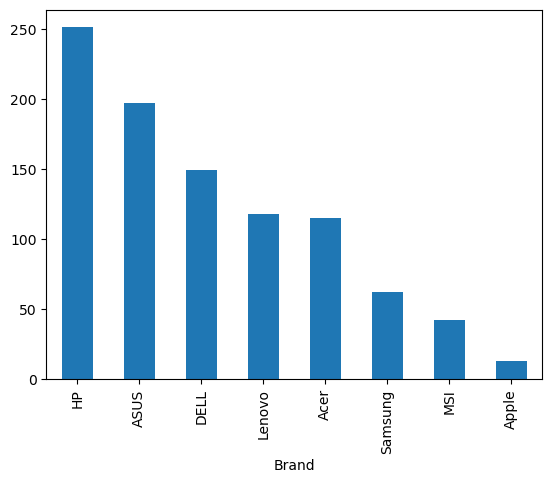

In [10]:
df['Brand'].value_counts().head(8).plot(kind='bar')
plt.show()

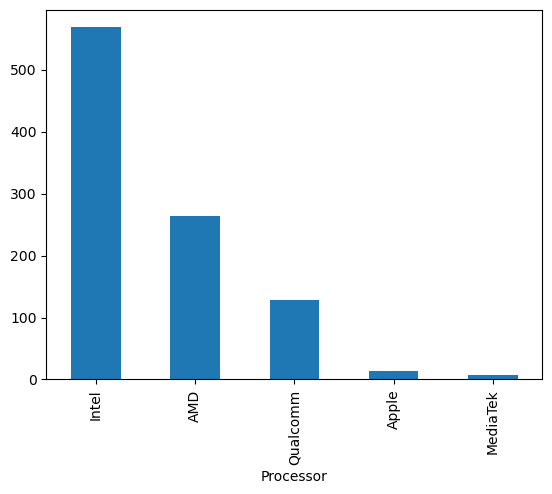

In [12]:
df['Processor'].value_counts().head(5).plot(kind='bar')
plt.show()

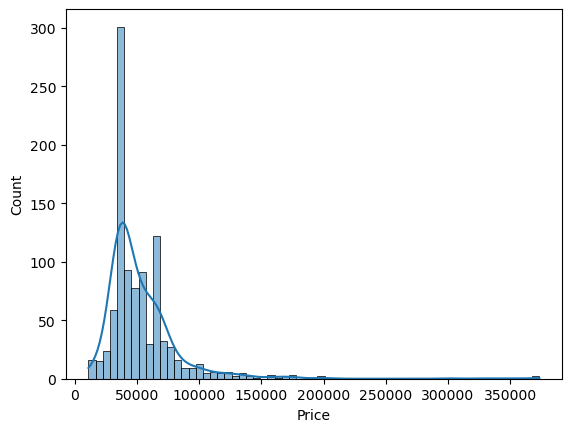

In [14]:
sns.histplot(x=df['Price'], kde=True)
plt.show()

<Axes: xlabel='Price'>

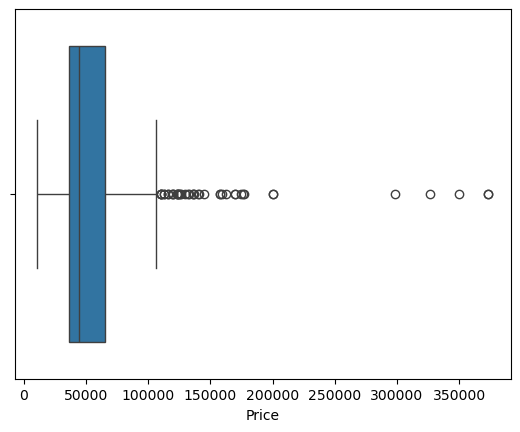

In [15]:
sns.boxplot(x = df['Price'])

In [17]:
q1 = df["Price"].quantile(0.25)
q3 = df["Price"].quantile(0.75)

iqr = q3 - q1

outliers = df[(df["Price"]< q1-1.5*iqr) | (df['Price']> q3+1.5*iqr)]
outliers

,Price,ratings,Page number,Original_price,Discount,Brand,Processor,no_of_Ratings,no_of_Reviews,Ram,Storage
54,119990,4.0,3,162090,25%,Lenovo,Intel,3,1,16,512
133,144699,4.1,6,154900,6%,Apple,Apple,703,51,24,512
333,112990,4.1,14,132590,14%,Lenovo,AMD,17,3,24,512
387,157990,4.6,17,191099,17%,HP,Intel,5,0,24,512
431,124900,4.7,19,92990,41%,Apple,Apple,1920,134,16,256
433,112990,4.1,19,132590,14%,Lenovo,AMD,17,3,24,512
448,169900,4.1,19,92990,41%,Apple,Apple,703,51,16,512
462,131990,3.5,20,138490,4%,DELL,Intel,11,0,16,512
482,129990,4.6,21,151990,14%,MSI,Intel,8,0,16,512
503,157990,4.6,22,191099,17%,HP,Intel,5,0,24,512


<Axes: xlabel='Brand'>

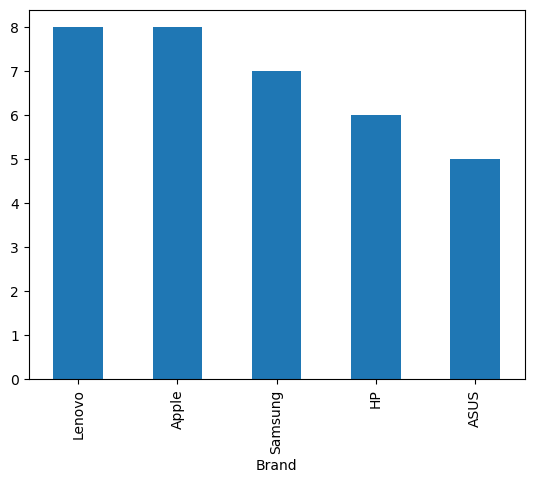

In [24]:
outliers['Brand'].value_counts().head().plot(kind='bar')

## Bivariate Analysis

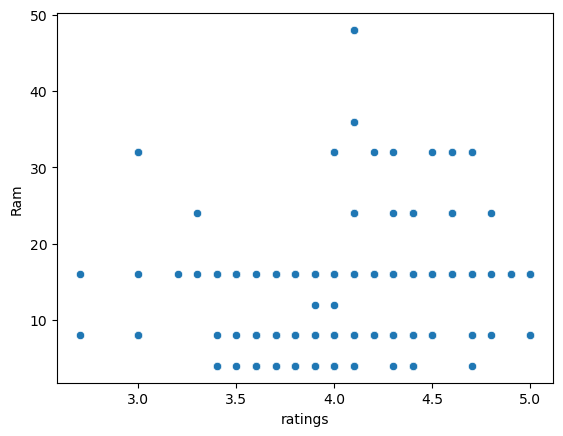

In [26]:
sns.scatterplot(x='ratings', y='Ram', data=df)
plt.show()

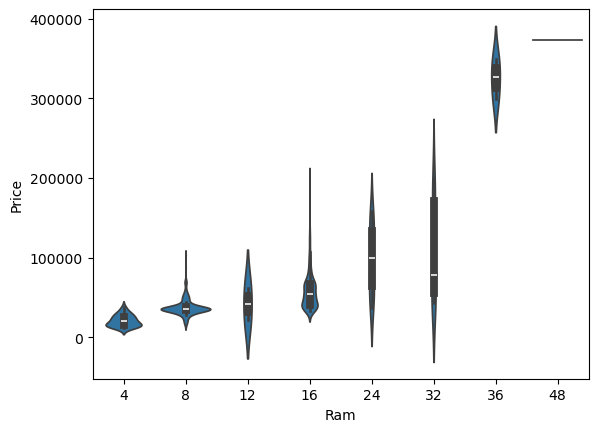

In [28]:
sns.violinplot(x="Ram", y="Price", data=df)
plt.show()

## Multivariate Analysis

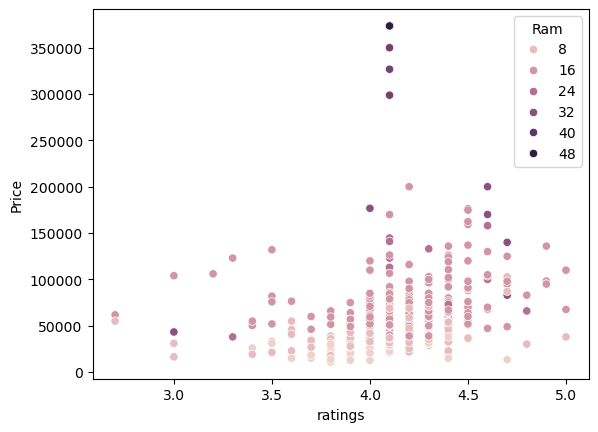

In [30]:
sns.scatterplot(x="ratings", y="Price", hue='Ram', data = df)
plt.show()

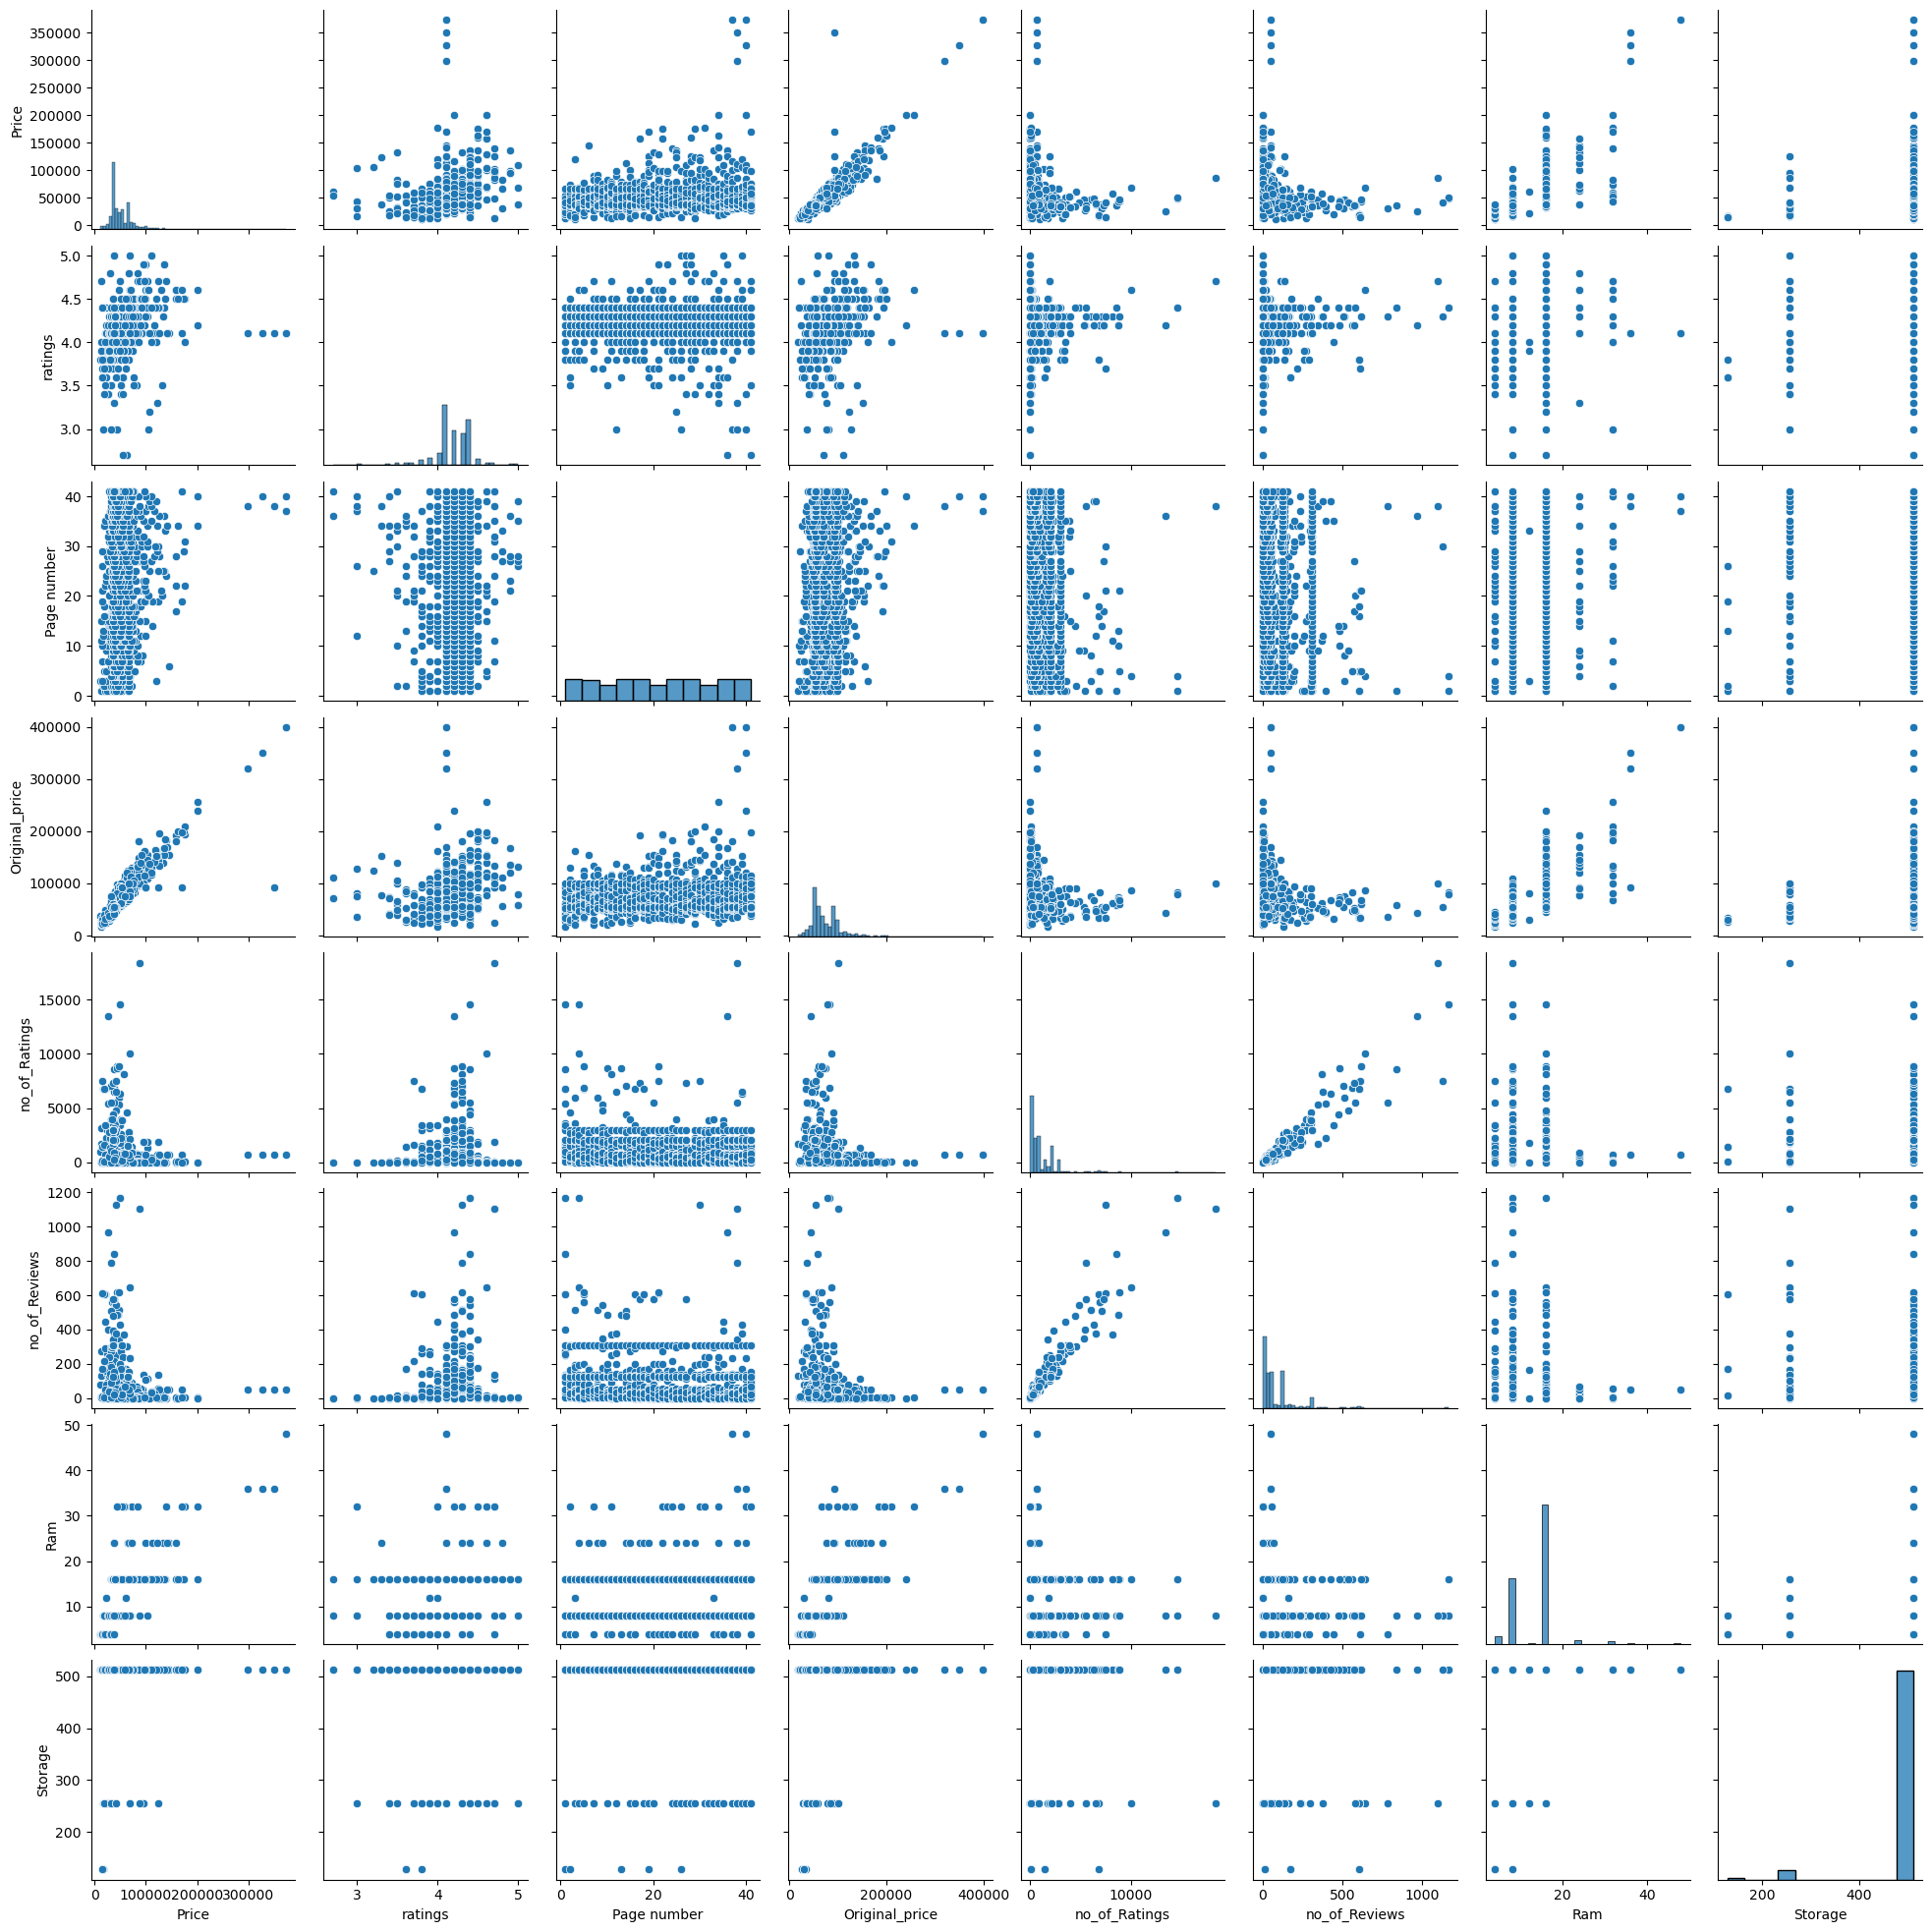

In [31]:
sns.pairplot(df)

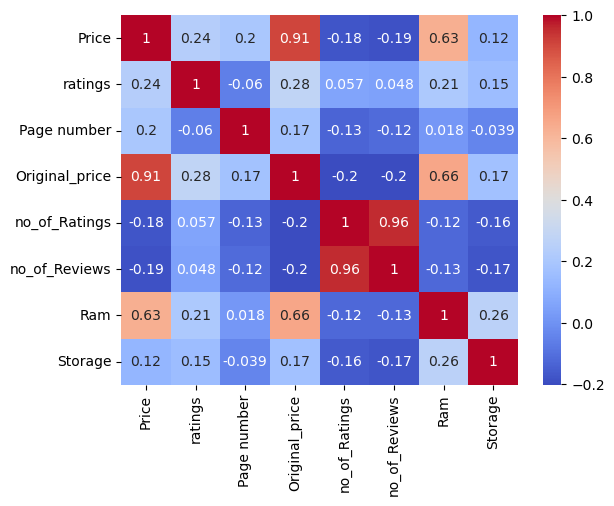

In [34]:
sns.heatmap(df.select_dtypes(include="number").corr(), annot=True, cmap="coolwarm")
plt.show()